Name: JOEL RAJU

Batch: R1

Date: 19/03/2023

Experiment Name: Encoder-Decoder Style Transfer model (Image to Image) / Image Denoising

Experiment Description: The experiment aims to use Deep Learning to Clean Noisy Images with
Deep Convolutional Autoencoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

Load the Dataset

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

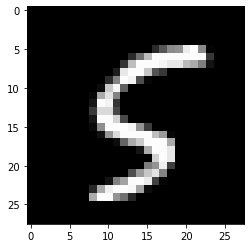

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

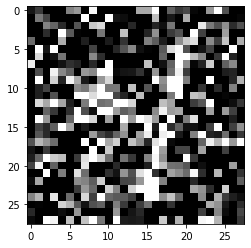

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

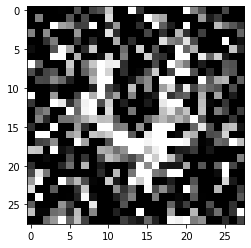

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

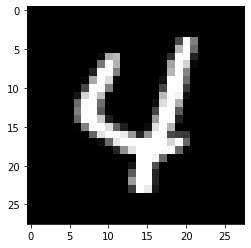

In [ ]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 14, 16)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [ ]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test),callbacks=[early_stop])

Epoch 1/20
235/235 [==============================] - 4s 11ms/step - loss: 0.2322 - val_loss: 0.1539
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1454 - val_loss: 0.1372
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1349 - val_loss: 0.1311
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1302 - val_loss: 0.1275
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1275 - val_loss: 0.1252
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1255 - val_loss: 0.1239
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1240 - val_loss: 0.1223
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1229 - val_loss: 0.1215
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1218 - val_loss: 0.1204
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1209 - val_lo

In [ ]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


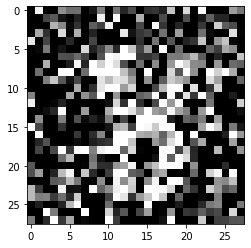

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

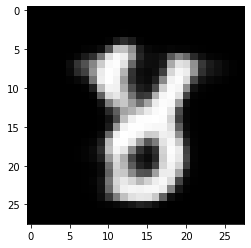

In [ ]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

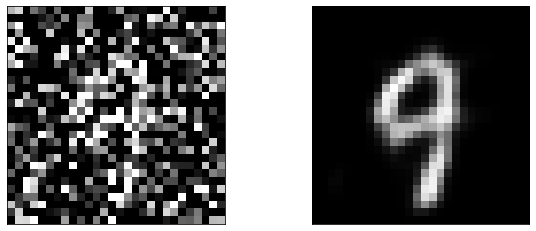

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

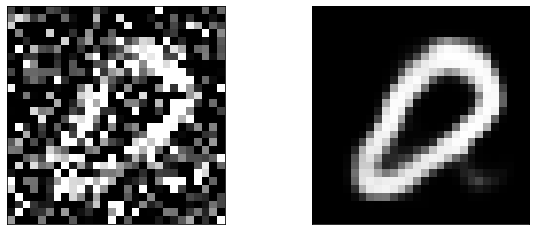

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()